## Credit Card Dataset for Clustering
Este caso requiere desarrollar una segmentación de clientes para definir la estrategia de marketing. 
El conjunto de datos de muestra resume el comportamiento de uso de aproximadamente 9000 titulares activos de tarjetas de crédito durante los últimos 6 meses. El archivo está a nivel de cliente con 18 variables de comportamiento.

### Importar Librerias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn import cluster
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

### Carga de Datos

In [ ]:
df = pd.read_csv('./Data/CreditCard.csv')

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 1. Análisis Descriptivo

### 1.1 Cantidad de registros y columnas

In [5]:
df.shape

(8950, 18)

### 1.2 Tipos de datos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### 1.3 Verificar la existencia de null's

In [7]:
# Verificar si hay valores nulos en el DataFrame
nulos_totales = df.isnull().sum()

# Mostrar el resumen de nulos por columna
print(nulos_totales)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


### 1.4 Análisis descriptivo básico

In [8]:
analisis_descriptivo = df.describe(include='all')  # Incluir todas las columnas, incluso categóricas
analisis_descriptivo

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C19190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


Este es un resumen estadístico para todas las columnas del DataFrame. Para columnas numéricas, incluirá métricas como:

+ count: Cantidad de valores no nulos.
+ unique: Cantidad de valores unicos en la columna
+ top: Valor mas frecuente en la columna
+ freq: Veces que aparece el valor mostrado en top
+ mean: Media.
+ std: Desviación estándar.
+ min: Valor mínimo.
+ 25%, 50%, 75%: Percentiles.
+ max: Valor máximo.

### 1.5 Descripción de los atributos

+ CUST_ID (Identificación del Cliente): Identificación del titular de la Tarjeta de Crédito (Categórica).
+ BALANCE (Saldo): Monto de saldo que queda en su cuenta para realizar compras.
+ BALANCE_FREQUENCY (Frecuencia de Actualización de Saldo): Con qué frecuencia se actualiza el saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia).
+ PURCHASES (Compras): Importe de las compras realizadas desde la cuenta.
+ ONEOFF_PURCHASES (Compras Únicas): Monto máximo de compra realizado de una sola vez.
+ INSTALLMENTS_PURCHASES (Compras a Plazos): Importe de la compra realizada a plazos.
+ CASH_ADVANCE (Adelanto en Efectivo): Efectivo por adelantado dado por el usuario.
+ PURCHASES_FREQUENCY (Frecuencia de Compras): Con qué frecuencia se realizan las compras, puntuación entre 0 y 1 (1 = compra frecuente, 0 = compra no frecuente).
+ ONEOFF_PURCHASES_FREQUENCY (Frecuencia de Compras Únicas): Con qué frecuencia se realizan compras de una sola vez (1 = compra frecuente, 0 = compra no frecuente).
+ PURCHASES_INSTALLMENTS_FREQUENCY (Frecuencia de Compras a Plazos): Frecuencia con la que se realizan las compras a plazos (1 = frecuente, 0 = no frecuente).
+ CASH_ADVANCE_FREQUENCY (Frecuencia de Adelantos en Efectivo): Con qué frecuencia se paga el adelanto en efectivo.
+ CASH_ADVANCE_TRX (Transacciones de Adelantos en Efectivo): Número de transacciones realizadas con "Adelanto en Efectivo".
+ PURCHASES_TRX (Transacciones de Compras): Número de transacciones de compra realizadas.
+ CREDIT_LIMIT (Límite de Crédito): Límite de tarjeta de crédito para el usuario.
+ PAYMENTS (Pagos): Importe del pago realizado por el usuario.
+ MINIMUM_PAYMENTS (Pagos Mínimos): Cantidad mínima de pagos realizados por el usuario.
+ PRC_FULL_PAYMENT (Porcentaje de Pago Total): Porcentaje del pago total pagado por el usuario.
+ TENURE (Antigüedad): Antigüedad del servicio de tarjeta de crédito para el usuario.

### 1.5 Crear la figura de distribución (box, densidad, etc)

### Boxplot
Dado que tenemos columnas como BALANCE, PURCHASES, CREDIT_LIMIT, etc., que son continuas y susceptibles a outliers, el boxplot será útil para identificar visualmente los valores atípicos.

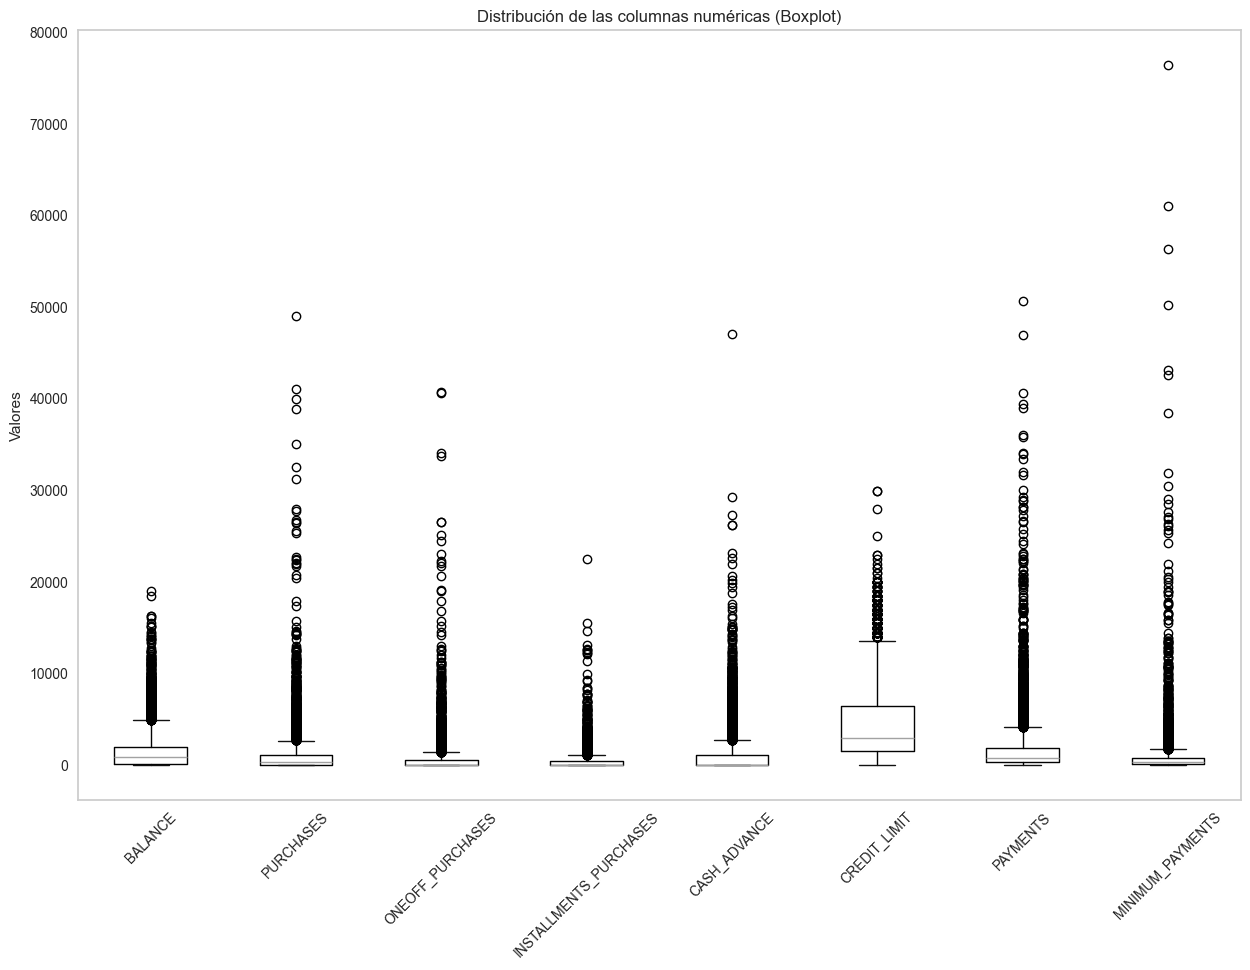

In [4]:
# Seleccionar columnas numéricas para el boxplot
numerical_columns = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 
                     'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 
                     'PAYMENTS', 'MINIMUM_PAYMENTS']

# Crear el boxplot
plt.figure(figsize=(15, 10))
df[numerical_columns].boxplot(rot=45, grid=False, showfliers=True)
plt.title('Distribución de las columnas numéricas (Boxplot)')
plt.ylabel('Valores')
plt.show()

### Gráficos de densidad
Los gráficos de densidad ayudarán a entender cómo están distribuidos los valores de estas mismas columnas.

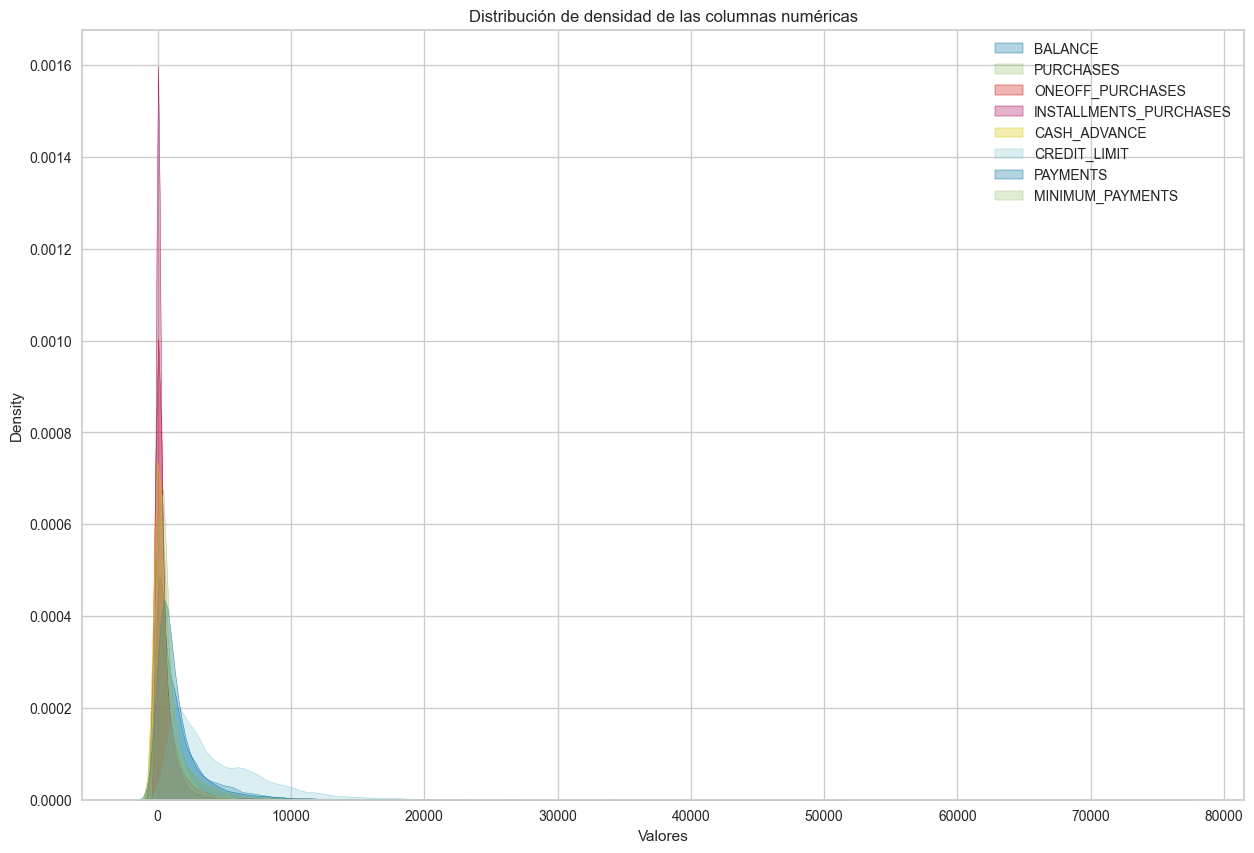

In [10]:
# Graficar densidades para columnas numéricas
plt.figure(figsize=(15, 10))
for column in numerical_columns:
    sns.kdeplot(df[column], label=column, fill=True, alpha=0.3)
    
plt.title('Distribución de densidad de las columnas numéricas')
plt.xlabel('Valores')
plt.legend()
plt.show()

### 1.6 Determinar los atributos con presencia de outlier

Detectar outliers es esencial para evitar que valores extremos distorsionen el análisis y afecten la precisión de los modelos. El método del rango intercuartílico (IQR), una técnica robusta que identifica valores fuera del rango esperado, ayuda a decidir si manejarlos o analizarlos como casos particulares.

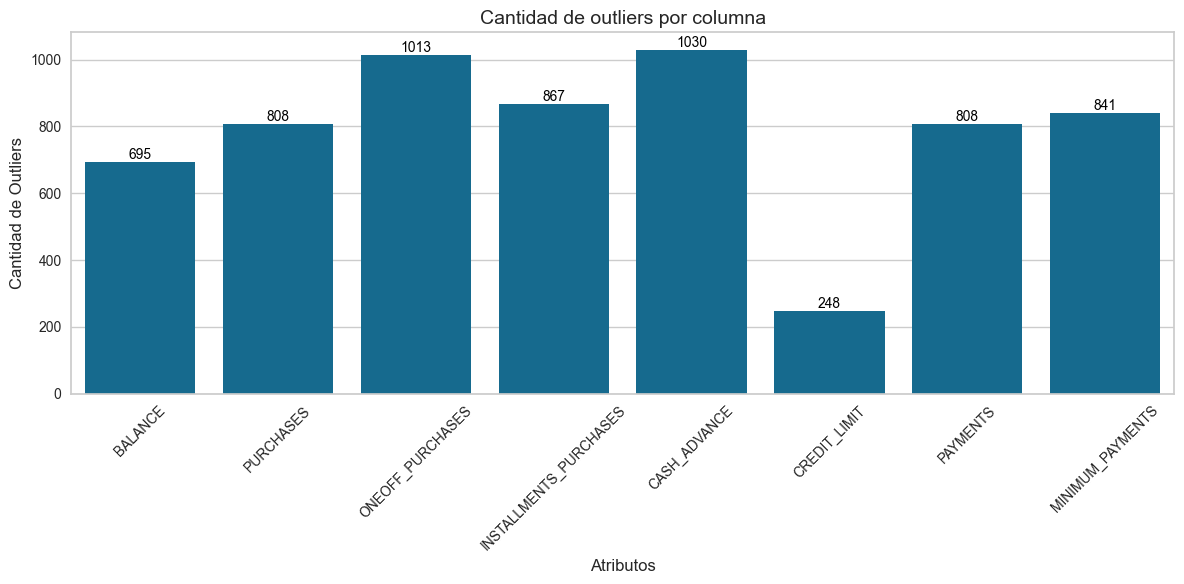

In [11]:
# Detectar outliers utilizando el método IQR
outliers = {}

# Calcular y almacenar el conteo de outliers para cada columna numérica
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df[column].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1  # Rango intercuartílico

    # Límites inferior y superior para determinar outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contar outliers fuera de los límites
    outliers[column] = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

# Visualizar la cantidad de outliers con un gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=list(outliers.keys()), y=list(outliers.values()))

# Anotar valores de outliers sobre las barras
for bar in ax.patches:
    ax.annotate(
        text=f"{int(bar.get_height())}",  # Texto con la cantidad de outliers
        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Personalizar diseño del gráfico
plt.xticks(rotation=45, fontsize=10)
plt.title('Cantidad de outliers por columna', fontsize=14)
plt.ylabel('Cantidad de Outliers', fontsize=12)
plt.xlabel('Atributos', fontsize=12)
plt.tight_layout()
plt.show()

La detección de outliers identificó valores extremos en atributos clave como BALANCE (695), PURCHASES (808) y CASH_ADVANCE (1030), entre otros. Estos outliers son importantes ya que reflejan comportamientos financieros atípicos, como clientes con saldos elevados o un uso inusual de crédito, lo cual puede impactar en la segmentación de clientes. Analizar estos valores extremos permite decidir si se deben ajustar o eliminar para evitar que distorsionen el análisis, asegurando que las estrategias de marketing se basen en datos más representativos y precisos.

### 2. Modificación y transformación

### 2.1 Removemos outlier en base al IQR
Utilizando el rango intercuartílico (IQR), eliminaremos los valores atípicos que están fuera de los límites definidos por este método, con el fin de mantener solo los valores representativos para el análisis.

In [5]:
# Guardar el tamaño inicial del DataFrame
size_before = len(df)

# Remover outliers utilizando el método IQR
for column in numerical_columns:
    Q1 = df[column].quantile(0.05)  # Primer cuartil
    Q3 = df[column].quantile(0.95)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico

    # Definir límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los valores dentro del rango
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Imprimir el número de filas eliminadas y la nueva longitud
print("La longitud del nuevo marco de datos es {}, {} filas se eliminaron".format(len(df), size_before - len(df)))

La longitud del nuevo marco de datos es 8281, 669 filas se eliminaron


Ahora, para visualizar el impacto de la eliminación de outliers, generaremos un gráfico de tipo boxplot que muestre la distribución de los atributos numéricos después de este proceso.

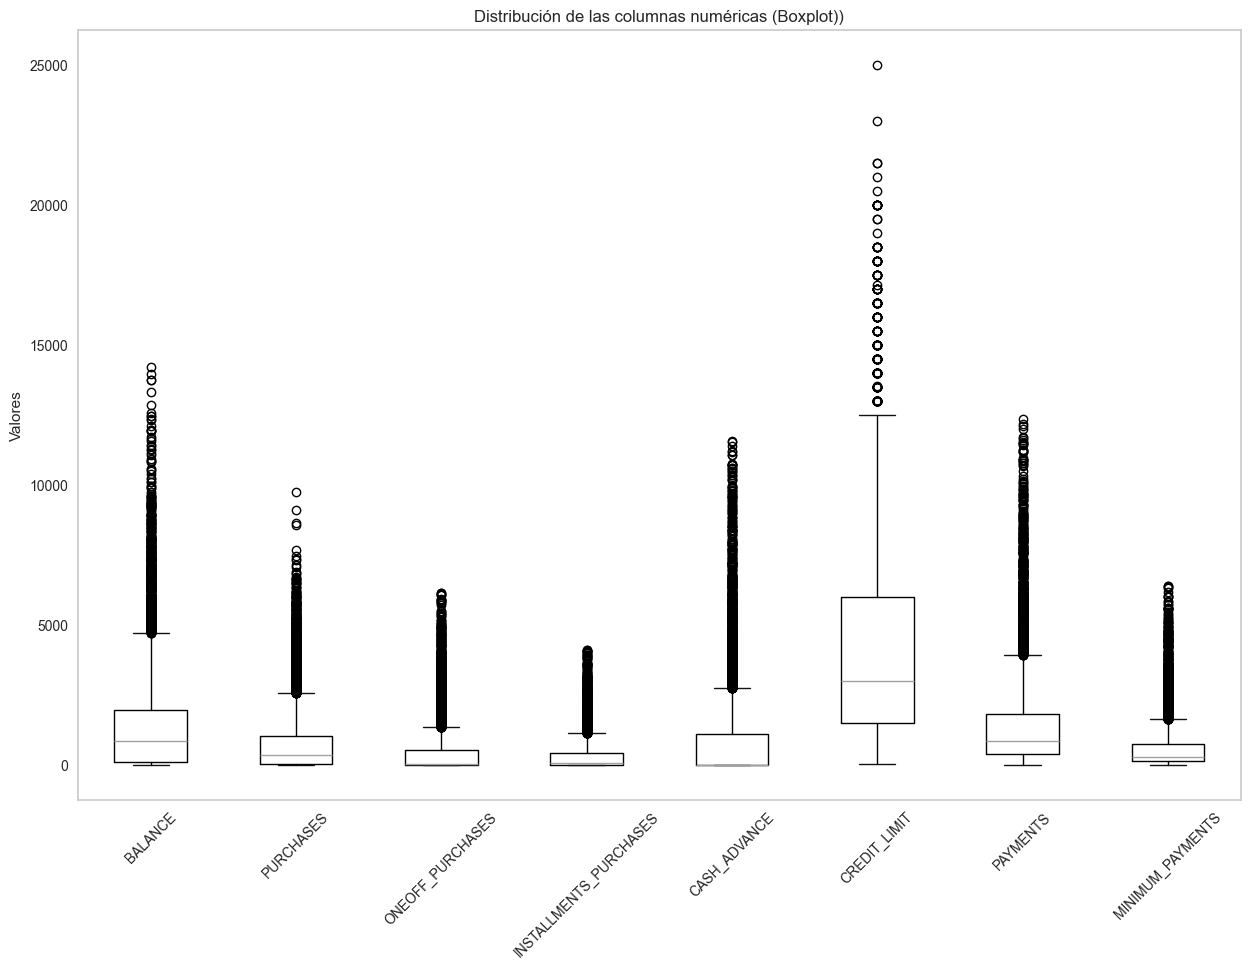

In [6]:
# Boxplot
plt.figure(figsize=(15, 10))
df[numerical_columns].boxplot(rot=45, grid=False, showfliers=True)
plt.title('Distribución de las columnas numéricas (Boxplot))')
plt.ylabel('Valores')
plt.show()

### 2.2 Eliminar columnas con poca significancia
Identificaremos y eliminaremos columnas con baja varianza o irrelevantes, como identificadores únicos, que no contribuyen al análisis y que pueden aumentar la complejidad de los modelos innecesariamente.

In [7]:
# Identificar columnas con baja varianza (por debajo del 1%)
low_variance_columns = [column for column in df.columns if df[column].nunique() / len(df) < 0.01]

# Eliminar columnas innecesarias o de baja significancia
columns_to_drop = ['CUST_ID'] + low_variance_columns  # Incluye columnas irrelevantes como CUST_ID
df.drop(columns=columns_to_drop, axis=1, inplace=True)

print("Columnas eliminadas:", columns_to_drop)
print("Nuevas dimensiones del DataFrame:", df.shape)

Columnas eliminadas: ['CUST_ID', 'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PRC_FULL_PAYMENT', 'TENURE']
Nuevas dimensiones del DataFrame: (8281, 9)


### 2.3 Eliminamos la presecia de null's o tratamiento de los mismos

In [8]:
df.dropna(inplace=True)
nulos_totales = df.isnull().sum()
print(nulos_totales)

BALANCE                   0
PURCHASES                 0
ONEOFF_PURCHASES          0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
PURCHASES_TRX             0
CREDIT_LIMIT              0
PAYMENTS                  0
MINIMUM_PAYMENTS          0
dtype: int64


### 2.4 Determinar la correlación

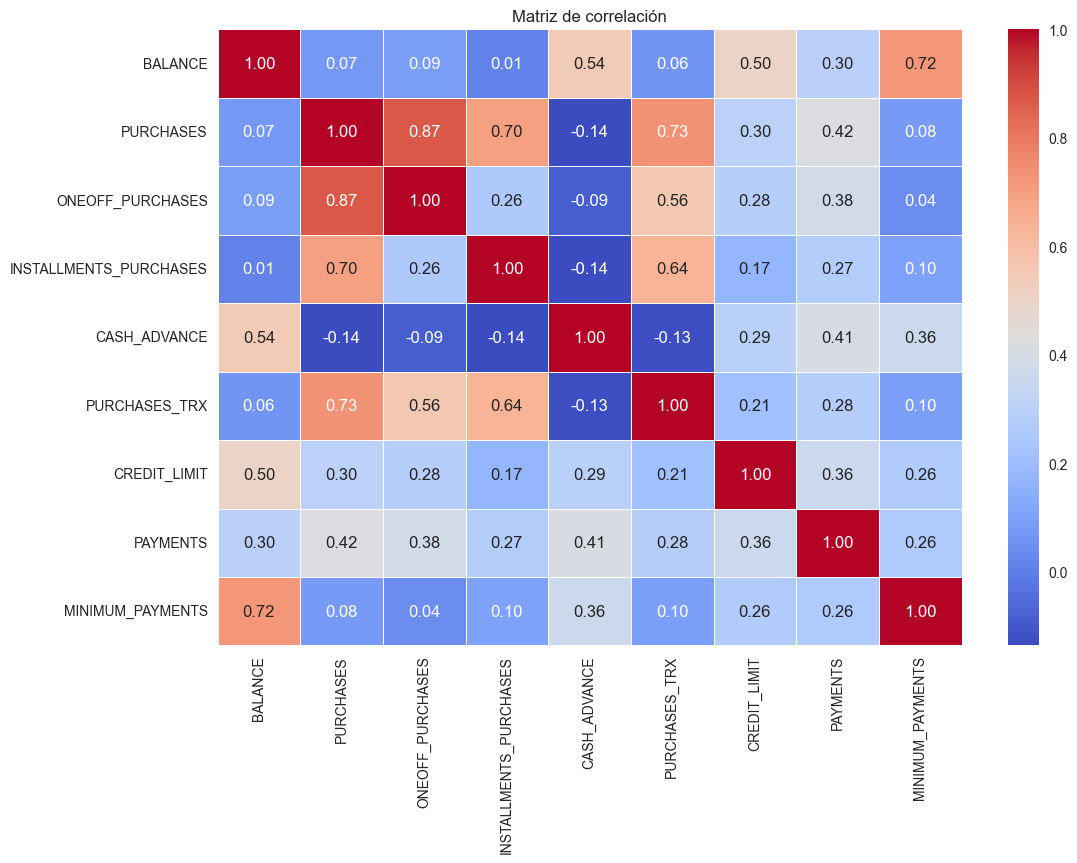

In [16]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

- Correlación fuerte entre compras en una sola exhibición y compras totales, lo que indica que estas dos variables están estrechamente relacionadas.
- Correlaciones moderadas entre compras a plazos, transacciones, saldo y avance en efectivo, lo que sugiere que los clientes que tienen más crédito o realizan más compras tienden a usar más el crédito de su tarjeta.
- Relación significativa entre el saldo y los pagos mínimos, lo que puede indicar que los saldos altos obligan a pagos mínimos mayores.

## 3. Modelo

### 3.1 Determinar la cantidad óptima de clusters

Distortion for 2 clusters: 118530704852.45253
Distortion for 3 clusters: 97863148622.71133
Distortion for 4 clusters: 85025978020.32729
Distortion for 5 clusters: 76421884544.18652
Distortion for 6 clusters: 69504784639.19876
Distortion for 7 clusters: 65071228472.25897
Distortion for 8 clusters: 58380827966.357056
Distortion for 9 clusters: 56393357933.312935
Distortion for 10 clusters: 52838556711.4183
Distortion for 11 clusters: 49787531777.42213
Distortion for 12 clusters: 47139130998.96299
Distortion for 13 clusters: 45850423428.67336
Distortion for 14 clusters: 44048589182.45881
Distortion for 15 clusters: 43407028069.366455
Distortion for 16 clusters: 40833046130.13309
Distortion for 17 clusters: 40894094194.42605
Distortion for 18 clusters: 38956775172.53733
Distortion for 19 clusters: 37590153800.11566


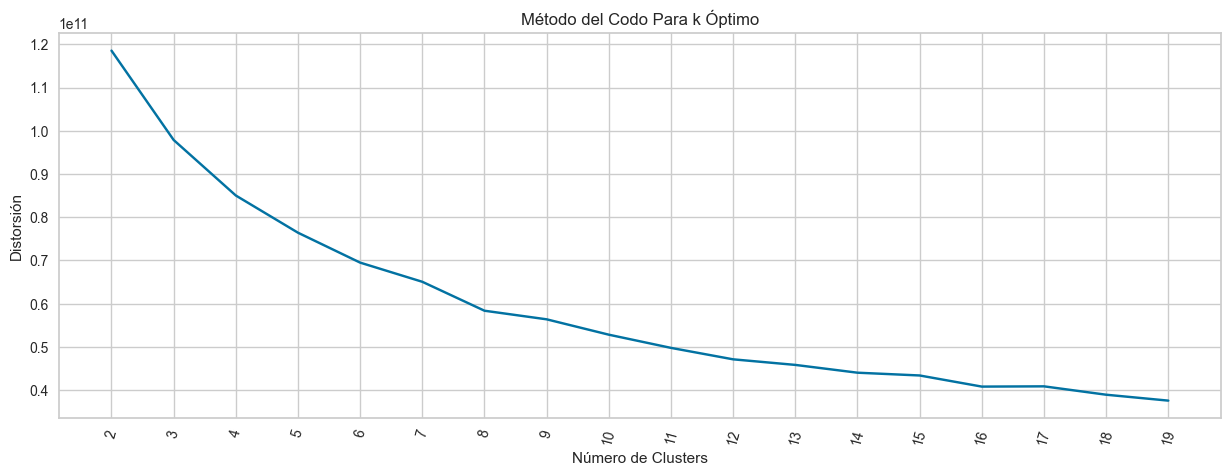

In [17]:
distorsions = []
max_loop = 20

# Iterar sobre diferentes números de clusters
for k in range(2, max_loop):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    inertia = kmeans.inertia_ # Obtener la inercia (distorsión) del modelo
    distorsions.append(inertia) # Agregar la inercia a la lista de distorsiones
    print(f"Distortion for {k} clusters: {inertia}")  # Imprimir la inercia para k clusters

# Graficar el número de clusters vs la distorsión
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel('Número de Clusters')
plt.ylabel('Distorsión')
plt.title('Método del Codo Para k Óptimo')
plt.grid(True)
plt.show()

Tras analizar la distorsión (SSE) para diferentes valores de k en el gráfico, se observa un claro 'codo' en el número de clusters igual a 6. A partir de este valor, la disminución de la distorsión es mucho más lenta, indicando que agregar más clusters no mejora significativamente la calidad del modelo. Por lo tanto, el número óptimo de clusters para este conjunto de datos es 6.

### 3.2 Entrenamos el modelo

In [18]:
# Definir la cantidad de clusters
nclust = 6

# Entrenar el modelo
k_means = KMeans(n_clusters=nclust)
k_means.fit(df)

KMeans(n_clusters=6)

### Visualización en gráficos de dispersión
A continuación usaremos la técnica de visualización 2D con los atributos del dataset.

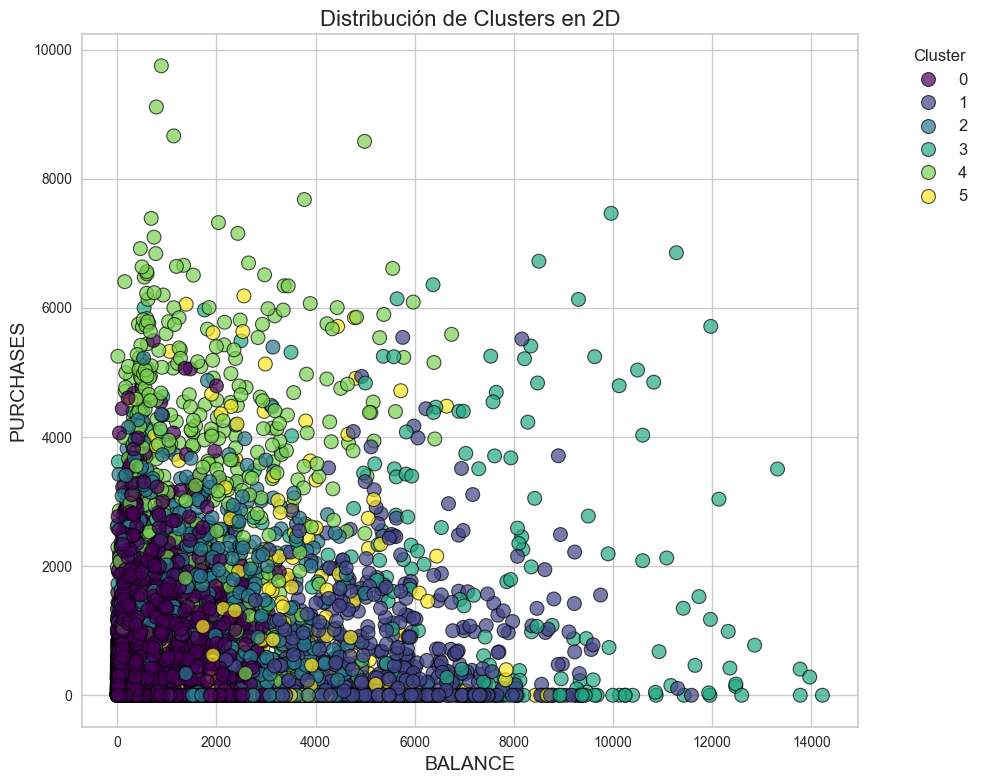

In [19]:
# Asignar el resultado de la predicción de los clusters al DataFrame
df['Cluster'] = k_means.labels_

# Seleccionar dos características para la visualización
features = ['BALANCE', 'PURCHASES']

# Crear el gráfico de dispersión con solo círculos
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df[features[0]], y=df[features[1]], hue=df['Cluster'], palette='viridis', marker='o', s=100, alpha=0.7, edgecolor='black')

# Personalizar el gráfico
plt.title('Distribución de Clusters en 2D', fontsize=16)
plt.xlabel(features[0], fontsize=14)
plt.ylabel(features[1], fontsize=14)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

- Existe una clara relación inversa entre BALANCE y PURCHASES en la mayoría de los clusters: clientes con balances más altos tienden a realizar menos compras (Clusters 1 y 0), mientras que aquellos con balances más bajos realizan más compras (Clusters 4 y 5).
- Los clusters intermedios (2 y 3) parecen ser una transición entre estos extremos, con clientes de actividad promedio.

# DBSCAN

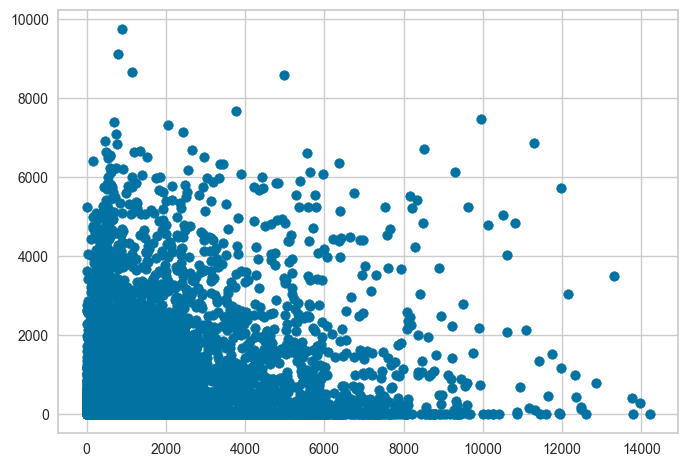

In [21]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])  # Asegúrate de que estos índices correspondan a tus datos
plt.show()

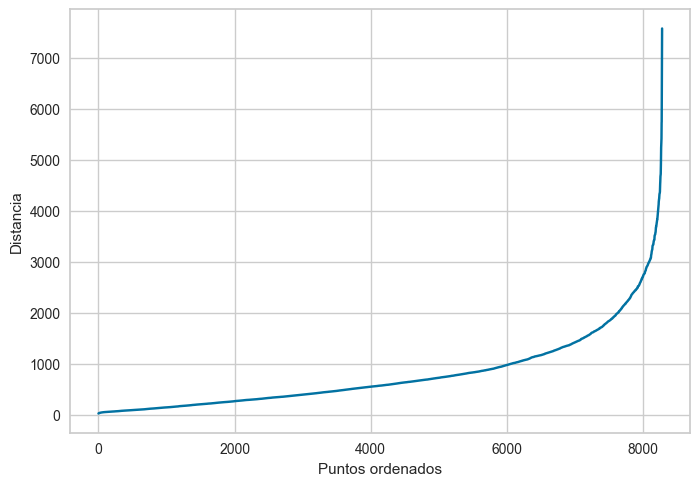

In [22]:
from sklearn.neighbors import NearestNeighbors

# Calcular las distancias entre los puntos
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

# Graficar las distancias de los 5 vecinos más cercanos
distances = np.sort(distances[:, 4], axis=0)  # Distancia del 5to vecino más cercano
plt.plot(distances)
plt.ylabel('Distancia')
plt.xlabel('Puntos ordenados')
plt.show()

In [78]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Normaliza tus datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Aplica DBSCAN sobre los datos escalados
dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters = dbscan.fit_predict(df_scaled)

# Imprime los resultados
print(clusters)
print("Número de clusters encontrados:", len(set(clusters)) - (1 if -1 in clusters else 0))
print("Puntos clasificados como ruido:", list(clusters).count(-1))

[0 0 0 ... 0 0 0]
Número de clusters encontrados: 2
Puntos clasificados como ruido: 520


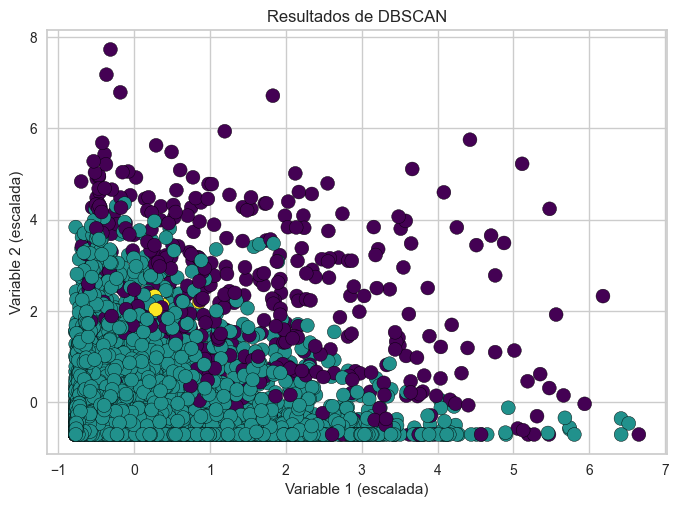

In [79]:
# Visualización de clusters
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters, cmap='viridis', s=100, edgecolor='black')
plt.title("Resultados de DBSCAN")
plt.xlabel("Variable 1 (escalada)")
plt.ylabel("Variable 2 (escalada)")
plt.show()

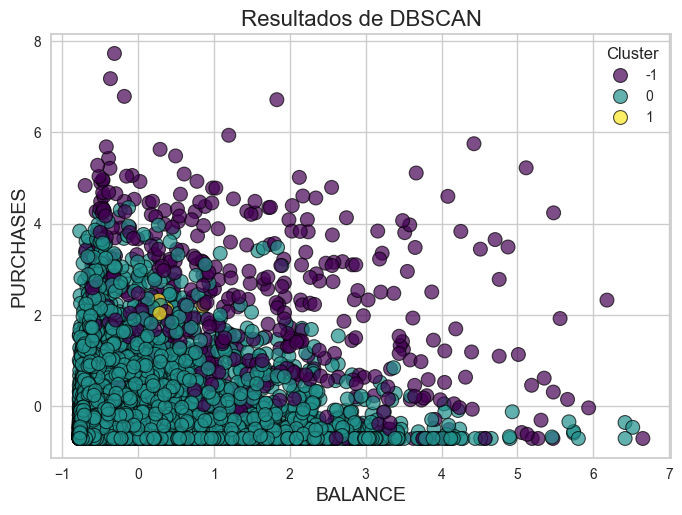

In [ ]:
# Asumiendo que 'clusters' contiene las etiquetas de clúster asignadas por DBSCAN y las has agregado al DataFrame 'df'
df['Cluster'] = clusters

# Seleccionar las características para la visualización
features = ['BALANCE', 'PURCHASES']

# Visualización de clusters
sns.scatterplot(x=df_scaled[:, df.columns.get_loc(features[0])], 
                y=df_scaled[:, df.columns.get_loc(features[1])], 
                hue=df['Cluster'], palette='viridis', marker='o', s=100, alpha=0.7, edgecolor='black')

plt.title("Resultados de DBSCAN", fontsize=16)
plt.xlabel(features[0], fontsize=14)
plt.ylabel(features[1], fontsize=14)
plt.show()